In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

    
    
    
def Belief(State,p,r):
   
    equilibrium = r/(1-p+r);
    
    if State[0]== 0 and State[1]> 0:
            Belief = (r-r*(p-r)**(State[1]))/(1+r-p);
    elif State[0]== 1 and State[1]> 0:
            Belief = (r+(1-p)*(p-r)**(State[1]))/(1+r-p);
            
    else:
        
        Belief = equilibrium;

    return Belief;
            
        
def WhittleIndex(State,p,r):
    WhittleIndex = 0.;

    
    if State[0]== 0 and State[1]>0:
        l= State[1];
        x= Belief([0,l],p,r);
        y=Belief([0,l+1],p,r);
        WhittleIndex =((x-y)*(l+1)+y)/(1-p+(x-y)*l+y); 
    elif State[0] == 1:
        WhittleIndex = r/((1-p)*(1+r-p)+r);
    
    else:
        WhittleIndex = r/((1-p)*(1+r-p)+r);
            
    return WhittleIndex;

def update(S,C,alpha,p,r,q,s,gamma,N):
        #the update process of each timestep.
        
        #S is the list of belief states of all channels.
        #C is the list of actual channel states.
        W = [0.]*N;
        Y = [0.]*N;
        Action = [0]*N;
        Threshold = 0.;
        Seed = np.random.rand(N);
        
       #Get the Threshold. 
        for i in range(int(N*gamma)):
            Y[i]= WhittleIndex(S[i],p,r);
        for i in range(int(N*gamma),N):
            Y[i]= WhittleIndex(S[i],q,s);
        
        Y.sort();
        Threshold = Y[int((1-alpha)*N)];
        
        
        
       #Get the Action vector.
        for i in range(int(N*gamma)):
            W[i]= WhittleIndex(S[i],p,r);
        for i in range(int(N*gamma),N):
            W[i]= WhittleIndex(S[i],q,s);
    
        h=0;
        for i in range(N):
            if W[i]>= Threshold:
                Action[i]=1;
                h=h+1;
            if h >= alpha*N:
                break;
            
       #The update process.
       
        for i in range(int(N*gamma)):
        
            if Action[i] == 0 and S[i][1]>0:
                S[i][1]= S[i][1]+1;
                if C[i]==0:
                    if Seed[i]<r:
                        C[i]=1;
                    else:
                        C[i]=0;
                else:
                    if Seed[i]<p:
                        C[i]=1;
                    else:
                        C[i]=0;
                
                
                
               
             
            elif Action[i] == 0 and S[i][1]==0:
                if C[i]==0:
                    if Seed[i]<r:
                        C[i]=1;
                    else:
                        C[i]=0;
                else: 
                    if Seed[i]<p:
                        C[i]=1;
                    else:
                        C[i]=0;
            
            else:
                if C[i]==1:
                    S[i]= [1,1];
                    C[i]= int((Seed[i]<p)==True);
                    
                else:
                    S[i]= [0,1];
                    C[i]= int((Seed[i]<r)==True);
        
        for i in range(int(N*gamma),N):
        
            if Action[i] == 0 and S[i][1]>0:
                S[i][1]= S[i][1]+1;
                if C[i]==0:
                    if Seed[i]<s:
                        C[i]=1;
                    else:
                        C[i]=0;
                else:
                    if Seed[i]<q:
                        C[i]=1;
                    else:
                        C[i]=0;
                
                
                
               
             
            elif Action[i] == 0 and S[i][1]==0:
                if C[i]==0:
                    if Seed[i]<s:
                        C[i]=1;
                    else:
                        C[i]=0;
                else: 
                    if Seed[i]<q:
                        C[i]=1;
                    else:
                        C[i]=0;
            
            else:
                if C[i]==1:
                    S[i]= [1,1];
                    C[i]= int((Seed[i]<q)==True);
                    
                else:
                    S[i]= [0,1];
                    C[i]= int((Seed[i]<s)==True);
        
        
        

    

def action(S,C,alpha,p,r,q,s,gamma,N):
    
    W = [0.]*N;
    Y = [0.]*N;
    Action = [0]*N;
    Threshold = 0.;
 
        
    #Get the Threshold. 
    for i in range(int(N*gamma)):
        Y[i]= WhittleIndex(S[i],p,r);
    for i in range(int(N*gamma),N):
        Y[i]= WhittleIndex(S[i],q,s);
        
    Y.sort();
    Threshold = Y[int((1-alpha)*N)];
    
    #Get the Action vector.
    for i in range(int(N*gamma)):
        W[i]= WhittleIndex(S[i],p,r);
    for i in range(int(N*gamma),N):
        W[i]= WhittleIndex(S[i],q,s);
    
    h=0;
    for i in range(N):
        if W[i]>= Threshold:
            Action[i]=1;
            h=h+1;
        if h >= alpha*N:
            break;
    
    return Action;
    

In [12]:
def average(mylist,first,last):
    sum = 0;
    
    for i in range(first,last):
        sum = sum + mylist[i];
    
    number = last - first;
    return sum/(number);

In [13]:
update([[0,0],[0,0],[0,3],[0,2],[0,0],[1,4],[1,3],[1,7],[0,4],[0,6]],[0,0,1,0,0,1,1,0,0,0],0.5,0.4,0.3,0.6,0.2,0.6,10)

In [14]:
print(action([[0,0],[0,0],[0,3],[0,2],[0,0],[1,4],[1,3],[1,7],[0,4],[0,6]],[0,0,1,0,0,1,1,0,0,0],0.5,0.4,0.3,0.6,0.2,0.6,10));

[1, 1, 0, 0, 1, 1, 1, 0, 0, 0]


In [30]:
import numpy as np
import matplotlib.pyplot as plt

def trace_action(S,C,timesteps,alpha,p,r,q,s,gamma,N):
    
    X = [0.]*timesteps;
    Y = [0.]*timesteps;
    Action = [0]*N;
    
    for i in range(timesteps):
        Action = action(S,C,alpha,p,r,q,s,gamma,N);
        
        X[i] = average(Action,0,int(gamma*N));
        Y[i] = average(Action,int(gamma*N),N);
        
        update(S,C,alpha,p,r,q,s,gamma,N);
        
    
    
    # definitions for the axes
    left, width = 0.01, 0.65
    bottom, height = 0.01, 0.65
    spacing = 0.005


    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(figsize=(8, 8))

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)
    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)
 

    # the scatter plot:
    ax_scatter.scatter(X, Y);

    # now determine nice limits by hand:
    binwidth = 0.1
    lim = np.ceil(np.abs([X, Y]).max() / binwidth) * binwidth
    ax_scatter.set_xlim((0, lim))
    ax_scatter.set_ylim((0, lim))

    bins = np.arange(0, lim + binwidth, binwidth)
    ax_histx.hist(X, bins=bins)
    ax_histy.hist(Y, bins=bins, orientation='horizontal')

    ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())

    plt.show()
        
        

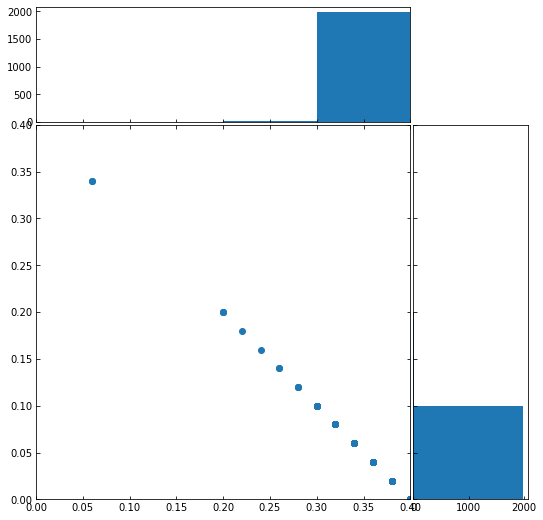

In [34]:
trace_action1([[0,0]]*100,[0]*100,2000,0.2,0.9,1/15,0.5,1/3,0.5,100);

In [131]:
import numpy as np
import matplotlib.pyplot as plt

def trace_action2(S,C,timesteps,alpha,p,r,q,s,gamma,N):
    
    X = [0.]*timesteps;
    Y = [0.]*timesteps;
    Action = [0]*N;
    
    for i in range(timesteps):
        Action = action(S,C,alpha,p,r,q,s,gamma,N);
        
        X[i] = average(Action,0,int(gamma*N))*gamma;
        Y[i] = average(Action,int(gamma*N),N)*(1-gamma);
        
        update(S,C,alpha,p,r,q,s,gamma,N);
        
    
    
    t = list(range(0,timesteps,1))
    
  
    plt.plot(t,X)
    
        
        

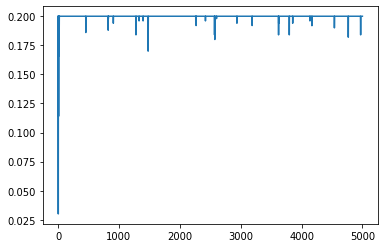

In [132]:
trace_action2([[0,0]]*500,[0]*500,5000,0.2,0.9,1/15,0.5,1/3,0.5,500);

In [102]:
import numpy as np
t=list(range(1,10,1))
print(t)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


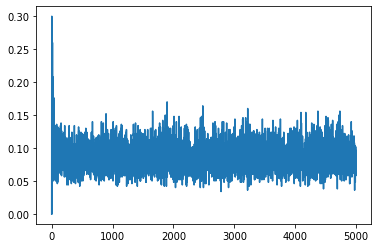

In [133]:
trace_action2([[0,0]]*500,[0]*500,5000,0.3,0.75,0.2,0.8,0.3,0.6,500);